In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\user\lightweight rank_eng.xlsx", header=1)
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_excel(r"C:\Users\user\lightweight rank_eng.xlsx")

df.head(19)

,,Islam Makhachev,Arman Tsarukyan,Charles Oliveira,Justin Gaethje,Max Holloway,Dustin Poirier,Dan Hooker,Mateusz Gamrot,Paddy Pimblett,Beneil Dariush,Renato Moicano,Rafael Fiziev,Michael Chandler,Benoit Saint-Denis,Grant Dawson,Yoel Alvarez
0,Weight category,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight,Light weight
1,Rank (position in the ranking),Champion,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15
2,Country,Russia,Armenia,Brazil,USA,USA,USA,New Zealand,Poland,England,Iran,Brazil,Azerbaijan,USA,France,USA,Spain
3,Age,33,28,35,36,32,36,35,34,30,35,35,32,38,29,31,32
4,Number of fights in UFC,17,11,34,14,30,30,22,10,7,23,18,10,7,8,13,9
5,Wins / Losses,14–1,8–2,23–11,27–5,26–8,30–9,24–12,24–3,23–3,22–6–1,20–6–1,12–4,23–10,13–3,23–2–1,22–3
6,Fighting style,Sambo,Kickboxer,BJJ,MMA,Muay Thai,BJJ,MMA,Wrestling,BJJ,MMA,BJJ,Muay Thai,Wrestler,MMA,BJJ,BJJ
7,Date of the last battle,2025-01-18 00:00:00,2024-04-13 00:00:00,2024-11-16 00:00:00,2025-03-08 00:00:00,2024-10-26 00:00:00,2024-06-01 00:00:00,2024-08-17 00:00:00,2024-08-17 00:00:00,2025-04-12 00:00:00,2023-12-02 00:00:00,2025-01-18 00:00:00,2025-03-08 00:00:00,2025-04-12 00:00:00,2024-09-28 00:00:00,2025-01-18 00:00:00,2024-12-14 00:00:00
8,Fight Fee (approximately $),1500000,300000,750000,750000,700000,1000000,200000,100000,200000,150000,100000,300000,500000,70000,50000,50000
9,"Bonuses (FOTN, POTN, etc.)",7,5,20,17,13,15,7,4,5,4,2,7,7,4,2,1


In [14]:
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\user\lightweight rank_eng.xlsx")

df_transposed = df.T

df_transposed.columns = df_transposed.iloc[0] 
df_clean = df_transposed.drop(df_transposed.index[0])

df_clean = df_clean.reset_index()
df_clean.rename(columns={'index': 'Name of the fighter'}, inplace=True)

print("Structure after transposition:")
print(df_clean.head())

print("\nColumn Titles:")
for i, col in enumerate(df_clean.columns):
    print(f"{i}: '{col}'")

print(f"\nDataFrame Form: {df_clean.shape}")

Structure after transposition:
  Name of the fighter Weight category Rank (position in the ranking)  Country  \
0     Islam Makhachev    Light weight                       Champion   Russia   
1     Arman Tsarukyan    Light weight                             #1  Armenia   
2    Charles Oliveira    Light weight                             #2   Brazil   
3      Justin Gaethje    Light weight                             #3      USA   
4        Max Holloway    Light weight                             #4      USA   

  Age Number of fights in UFC Wins / Losses Fighting style  \
0  33                      17          14–1          Sambo   
1  28                      11           8–2      Kickboxer   
2  35                      34         23–11            BJJ   
3  36                      14          27–5            MMA   
4  32                      30          26–8      Muay Thai   

  Date of the last battle Fight Fee (approximately $)  \
0     2025-01-18 00:00:00                     150000

In [18]:
import pandas as pd
import numpy as np

# Создаем копию данных для работы
df_work = df_clean.copy()

# Убираем знаки вопроса из числовых данных (исправляем FutureWarning)
df_work = df_work.replace(to_replace=r'(\d+)\?', value=r'\1', regex=True).infer_objects(copy=False)

# Список числовых колонок (ИСПРАВЛЕНО: добавлена запятая после 'Age')
numeric_columns = [
    'Age',  # <- добавлена запятая
    'Number of fights in UFC',
    'Fight Fee (approximately $)',
    'Bonuses (FOTN, POTN, etc.)',
    'Instagram followers',
    'Number of battles per year (on average)',
    'Number of cancelled/postponed battles'
]

# Конвертируем колонки в числовой формат
for col in numeric_columns:
    if col in df_work.columns:
        df_work[col] = pd.to_numeric(df_work[col], errors='coerce')
        print(f" Column converted: {col}")
    else:
        print(f" Column not found: {col}")

# Проверяем только существующие колонки
existing_numeric_columns = [col for col in numeric_columns if col in df_work.columns]

print("\nGaps in numerical columns:")
missing = df_work[existing_numeric_columns].isnull().sum()
print(missing)

print("\nFirst 5 lines after conversion:")
display_columns = ['Name of the fighter'] + existing_numeric_columns
print(df_work[display_columns].head())

print("\nData types for numeric columns:")
print(df_work[existing_numeric_columns].dtypes)

print("\nBasic statistics:")
print(df_work[existing_numeric_columns].describe())

 Column converted: Age
 Column converted: Number of fights in UFC
 Column converted: Fight Fee (approximately $)
 Column converted: Bonuses (FOTN, POTN, etc.)
 Column converted: Instagram followers
 Column converted: Number of battles per year (on average)
 Column converted: Number of cancelled/postponed battles

Gaps in numerical columns:
 
Age                                        0
Number of fights in UFC                    0
Fight Fee (approximately $)                0
Bonuses (FOTN, POTN, etc.)                 0
Instagram followers                        0
Number of battles per year (on average)    0
Number of cancelled/postponed battles      0
dtype: int64

First 5 lines after conversion:
  Name of the fighter  Age  Number of fights in UFC  \
0     Islam Makhachev   33                       17   
1     Arman Tsarukyan   28                       11   
2    Charles Oliveira   35                       34   
3      Justin Gaethje   36                       14   
4        Max Hollowa

C:\Users\user\AppData\Local\Temp\ipykernel_20784\3797044690.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_work = df_work.replace(to_replace=r'(\d+)\?', value=r'\1', regex=True).infer_objects(copy=False)


In [19]:
# Create additional numeric indicators from text columns

def score_ppv_participation(ppv_text):
    if pd.isna(ppv_text):
        return 0
    ppv_text = str(ppv_text).lower()
    if 'lots of ppv main fights' in ppv_text:
        return 10  # Maximum value
    elif 'ppv main fights' in ppv_text:
        return 8
    elif 'ppv' in ppv_text:
        return 6
    elif 'not yet, but will be soon' in ppv_text:
        return 4
    elif '-' in ppv_text:
        return 0
    else:
        return 1

def score_social_activity(activity_text):
    if pd.isna(activity_text):
        return 0
    activity_text = str(activity_text).lower()
    if 'high' in activity_text or '3-5 posts per week' in activity_text:
        return 8
    elif 'average' in activity_text or '1-2 posts per week' in activity_text:
        return 5
    elif 'low' in activity_text:
        return 2
    else:
        return 1

def score_media_presence(media_text):
    if pd.isna(media_text):
        return 0
    media_text = str(media_text).lower()
    if 'increased after ufc 300' in media_text:
        return 10
    elif 'large' in media_text:
        return 8
    elif 'average' in media_text:
        return 5
    elif 'low' in media_text:
        return 2
    else:
        return 1

def score_championship_potential(potential_text):
    if pd.isna(potential_text):
        return 0
    potential_text = str(potential_text).lower()
    if 'champion' in potential_text:
        return 10
    elif 'very high chance' in potential_text:
        return 9
    elif 'high chance' in potential_text:
        return 7
    elif 'probably not' in potential_text:
        return 4
    elif 'no chance' in potential_text:
        return 2
    else:
        return 1

def score_activity_frequency(downtime_text):
    if pd.isna(downtime_text):
        return 0
    downtime_text = str(downtime_text).lower()
    if 'low' in downtime_text:
        return 8
    elif 'average' in downtime_text:
        return 5
    elif 'large' in downtime_text:
        return 2
    else:
        return 1

# Apply functions to data
df_work['PPV_Score'] = df_work['Participation in PPV'].apply(score_ppv_participation)
df_work['Social_Activity_Score'] = df_work['Social media activity (post frequency)'].apply(score_social_activity)
df_work['Media_Presence_Score'] = df_work['News presence / hype'].apply(score_media_presence)
df_work['Championship_Potential_Score'] = df_work['Championship potential'].apply(score_championship_potential)
df_work['Activity_Frequency_Score'] = df_work['Downtime between battles'].apply(score_activity_frequency)

# Show results
print("New scoring columns:")
scoring_cols = ['PPV_Score', 'Social_Activity_Score', 'Media_Presence_Score', 
                'Championship_Potential_Score', 'Activity_Frequency_Score']
print(df_work[['Name of the fighter'] + scoring_cols].head(10))

# Check score distribution
print("\nScore distribution:")
for col in scoring_cols:
    print(f"{col}: {df_work[col].describe()}")

New scoring columns:
  Name of the fighter  PPV_Score  Social_Activity_Score  Media_Presence_Score  \
0     Islam Makhachev         10                      5                     8   
1     Arman Tsarukyan          4                      5                    10   
2    Charles Oliveira         10                      8                     8   
3      Justin Gaethje         10                      5                     8   
4        Max Holloway         10                      8                     8   
5      Dustin Poirier         10                      8                     8   
6          Dan Hooker          0                      5                     8   
7      Mateusz Gamrot          0                      5                     8   
8      Paddy Pimblett          4                      8                     8   
9      Beneil Dariush          0                      5                     5   

   Championship_Potential_Score  Activity_Frequency_Score  
0                          

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function for normalization (scaling to 0-1)
def normalize_column(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return series * 0 + 0.5  # If all values are the same, set to 0.5
    return (series - min_val) / (max_val - min_val)

# List of all metrics for normalization
metrics_to_normalize = [
    'Age',
    'Number of fights in UFC',
    'Fight Fee (approximately $)',
    'Bonuses (FOTN, POTN, etc.)',
    'Instagram followers',
    'Number of battles per year (on average)',
    'Number of cancelled/postponed battles',
    'PPV_Score',
    'Social_Activity_Score',
    'Media_Presence_Score',
    'Championship_Potential_Score',
    'Activity_Frequency_Score'
]

# Create copy for normalized data
df_normalized = df_work.copy()

# Normalize metrics
for metric in metrics_to_normalize:
    if metric in df_work.columns:
        df_normalized[f'{metric}_normalized'] = normalize_column(df_work[metric])

# Reverse normalization for age and cancelled fights (less = better)
df_normalized['Age_normalized'] = 1 - df_normalized['Age_normalized']
df_normalized['Number of cancelled/postponed battles_normalized'] = 1 - df_normalized['Number of cancelled/postponed battles_normalized']

# Define weights for each metric (sum should be 1.0)
weights = {
    'Fight Fee (approximately $)_normalized': 0.20,  # 20% - main indicator
    'Instagram followers_normalized': 0.15,  # 15% - social popularity
    'PPV_Score_normalized': 0.15,  # 15% - PPV participation
    'Media_Presence_Score_normalized': 0.12,  # 12% - media presence
    'Championship_Potential_Score_normalized': 0.10,  # 10% - potential
    'Bonuses (FOTN, POTN, etc.)_normalized': 0.08,  # 8% - entertainment value
    'Social_Activity_Score_normalized': 0.08,  # 8% - social media activity
    'Activity_Frequency_Score_normalized': 0.05,  # 5% - activity frequency
    'Number of battles per year (on average)_normalized': 0.04,  # 4% - fighting activity
    'Number of fights in UFC_normalized': 0.02,  # 2% - experience
    'Age_normalized': 0.01,  # 1% - age
    'Number of cancelled/postponed battles_normalized': -0.01  # -1% - reliability penalty
}

# Calculate final business rating
df_normalized['Business_Value_Score'] = 0
for metric, weight in weights.items():
    if metric in df_normalized.columns:
        df_normalized['Business_Value_Score'] += df_normalized[metric] * weight

# Scale to 0-100 for convenience
df_normalized['Business_Value_Score'] = df_normalized['Business_Value_Score'] * 100

# Sort by rating
df_final = df_normalized.sort_values('Business_Value_Score', ascending=False)

# Show top-10 fighters by business value
print("TOP-10 FIGHTERS BY BUSINESS VALUE:")
print("=" * 60)
top_columns = ['Name of the fighter', 'Business_Value_Score', 'Fight Fee (approximately $)', 
               'Instagram followers', 'PPV_Score', 'Media_Presence_Score']
for i, (_, row) in enumerate(df_final[top_columns].head(10).iterrows(), 1):
    print(f"{i:2d}. {row['Name of the fighter']:<20} | Rating: {row['Business_Value_Score']:.1f}")
    print(f"    Fee: ${row['Fight Fee (approximately $)']:,} | "
          f"Followers: {row['Instagram followers']:,} | "
          f"PPV: {row['PPV_Score']}/10 | Media: {row['Media_Presence_Score']}/10")
    print()

# Business rating statistics
print("\nBusiness rating statistics:")
print(df_final['Business_Value_Score'].describe())

# Show weight coefficients
print("\nWEIGHT COEFFICIENTS:")
print("=" * 40)
for metric, weight in sorted(weights.items(), key=lambda x: x[1], reverse=True):
    metric_name = metric.replace('_normalized', '').replace('_', ' ')
    print(f"{metric_name:<35} {weight:>6.1%}")

TOP-10 FIGHTERS BY BUSINESS VALUE:
 1. Islam Makhachev      | Rating: 80.4
    Fee: $1,500,000 | Followers: 10,200,000 | PPV: 10/10 | Media: 8/10

 2. Charles Oliveira     | Rating: 70.2
    Fee: $750,000 | Followers: 8,000,000 | PPV: 10/10 | Media: 8/10

 3. Dustin Poirier       | Rating: 61.7
    Fee: $1,000,000 | Followers: 5,000,000 | PPV: 10/10 | Media: 8/10

 4. Max Holloway         | Rating: 58.6
    Fee: $700,000 | Followers: 5,000,000 | PPV: 10/10 | Media: 8/10

 5. Justin Gaethje       | Rating: 54.4
    Fee: $750,000 | Followers: 2,400,000 | PPV: 10/10 | Media: 8/10

 6. Arman Tsarukyan      | Rating: 46.4
    Fee: $300,000 | Followers: 1,900,000 | PPV: 4/10 | Media: 10/10

 7. Paddy Pimblett       | Rating: 33.7
    Fee: $200,000 | Followers: 400,000 | PPV: 4/10 | Media: 8/10

 8. Benoit Saint-Denis   | Rating: 30.3
    Fee: $70,000 | Followers: 8,000,000 | PPV: 0/10 | Media: 2/10

 9. Mateusz Gamrot       | Rating: 21.6
    Fee: $100,000 | Followers: 400,000 | PPV: 0/10 | 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def create_top_fighters_chart(df_final):
    """Creates bar chart of top-10 fighters by business value"""
    fig, ax = plt.subplots(figsize=(14, 8))
    top_10 = df_final.head(10)
    colors = plt.cm.viridis(np.linspace(0.8, 0.2, 10))
    bars = ax.barh(range(len(top_10)), top_10['Business_Value_Score'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10['Name of the fighter'], fontsize=11)
    ax.set_xlabel('Business Rating (0-100)', fontsize=13, fontweight='bold')
    ax.set_title('TOP-10 UFC FIGHTERS BY BUSINESS VALUE', 
                 fontsize=16, fontweight='bold', pad=20)
    for i, (bar, score) in enumerate(zip(bars, top_10['Business_Value_Score'])):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{score:.1f}', va='center', fontweight='bold', fontsize=10)
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    ax.set_xlim(0, max(top_10['Business_Value_Score']) * 1.1)
    plt.tight_layout()
    plt.show()

def create_correlation_scatter(df_final):
    """Creates scatter plot: followers vs fight frequency"""
    fig, ax = plt.subplots(figsize=(12, 8))
    # Check and use correct column names from your DataFrame
    print("Available columns:", df_final.columns.tolist())
    
    # Try different possible column names
    instagram_col = None
    fights_col = None
    fee_col = None
    
    # Find Instagram followers column
    for col in df_final.columns:
        if 'instagram' in col.lower() or 'followers' in col.lower():
            instagram_col = col
            break
    
    # Find fights per year column
    for col in df_final.columns:
        if 'battles' in col.lower() and 'year' in col.lower():
            fights_col = col
            break
        elif 'fights' in col.lower() and 'year' in col.lower():
            fights_col = col
            break
    
    # Find fight fee column
    for col in df_final.columns:
        if 'fight fee' in col.lower() and '$' in col.lower():
            fee_col = col
            break
    
    if instagram_col and fights_col and fee_col:
        x = df_final[instagram_col] / 1000  
        y = df_final[fights_col]
        size = df_final[fee_col] / 1000
    else:
        print(f"Could not find columns: Instagram={instagram_col}, Fights={fights_col}, Fee={fee_col}")
        return 
    
    color = df_final['Business_Value_Score']  
    scatter = ax.scatter(x, y, s=size, c=color, alpha=0.7, 
                        cmap='viridis', edgecolors='black', linewidth=0.5)
    ax.set_xlabel('Instagram Followers (thousands)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Fights per Year', fontsize=13, fontweight='bold')
    ax.set_title('CORRELATION: Popularity vs Activity vs Purse', 
                 fontsize=16, fontweight='bold', pad=20)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Business Rating', fontsize=12, fontweight='bold')
    
    top_5 = df_final.head(5)
    for idx, fighter in top_5.iterrows():
        ax.annotate(fighter['Name of the fighter'],
                   (fighter[instagram_col]/1000, 
                    fighter[fights_col]),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, alpha=0.8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_correlation_heatmap(df_final):
    """Creates heatmap of correlations between metrics"""
    # First, let's check what columns are actually available
    print("Available columns in DataFrame:")
    print(df_final.columns.tolist())
    
    # Try to find the correct column names
    metrics_for_corr = ['Business_Value_Score']
    
    # Find fight fee column
    for col in df_final.columns:
        if 'fight fee' in col.lower():
            metrics_for_corr.append(col)
            break
    
    # Find other columns
    for col in df_final.columns:
        if 'instagram' in col.lower() or 'followers' in col.lower():
            metrics_for_corr.append(col)
            break
    
    # Add other standard columns that should exist
    potential_cols = ['PPV_Score', 'Media_Presence_Score', 'Championship_Potential_Score', 
                     'Bonuses (FOTN, POTN, etc.)', 'Social_Activity_Score', 'Age']
    
    for col in potential_cols:
        if col in df_final.columns:
            metrics_for_corr.append(col)
    
    # Find fights per year column
    for col in df_final.columns:
        if ('fights' in col.lower() or 'battles' in col.lower()) and 'year' in col.lower():
            metrics_for_corr.append(col)
            break
    
    print(f"Using columns for correlation: {metrics_for_corr}")
    
    corr_matrix = df_final[metrics_for_corr].corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'label': 'Correlation'},
                annot_kws={'size': 9})
    ax.set_title('BUSINESS METRICS CORRELATION MATRIX', 
                 fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def create_salary_distribution(df_final):
    """Creates boxplot of purse distribution by ranks"""
    # Find the correct fight fee column name
    fee_col = None
    for col in df_final.columns:
        if 'fight fee' in col.lower():
            fee_col = col
            break
    
    if fee_col is None:
        print("Could not find fight fee column")
        return
    
    df_final['Rank_Category'] = pd.cut(df_final['Business_Value_Score'], 
                                      bins=[0, 30, 50, 70, 100], 
                                      labels=['Low (0-30)', 'Medium (30-50)', 
                                             'High (50-70)', 'Top (70-100)'])
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(data=df_final, x='Rank_Category', y=fee_col,
                palette='viridis', ax=ax)
    ax.set_xlabel('Business Rating Category', fontsize=13, fontweight='bold')
    ax.set_ylabel('Fight Purse ($)', fontsize=13, fontweight='bold')
    ax.set_title('PURSE DISTRIBUTION BY BUSINESS VALUE RANKS', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def find_hidden_gems(df_final):
    """Finds fighters with high potential at low costs"""
    print("\n" + "="*80)
    print("HIDDEN GEMS ANALYSIS (High ROI Potential)")
    print("="*80)
    
    # Find correct column names
    fee_col = None
    for col in df_final.columns:
        if 'fight fee' in col.lower():
            fee_col = col
            break
    
    if fee_col is None:
        print("Could not find fight fee column")
        return
    
    low_salary = df_final[fee_col] < df_final[fee_col].median()
    high_potential = df_final['Championship_Potential_Score'] >= 7
    good_social = df_final['Instagram followers'] > 100000
    hidden_gems = df_final[low_salary & high_potential & good_social].head(5)
    if len(hidden_gems) > 0:
        print("Fighters with high potential at low investment:")
        print("-" * 60)
        for i, (idx, fighter) in enumerate(hidden_gems.iterrows(), 1):
            print(f"{i}. {fighter['Name of the fighter']}")
            print(f"   Rating: {fighter['Business_Value_Score']:.1f}")
            print(f"   Purse: ${fighter[fee_col]:,}")
            print(f"   Potential: {fighter['Championship_Potential_Score']}/10")
            print(f"   Followers: {fighter['Instagram followers']:,}")
            print()
    else:
        print("No hidden gems found by specified criteria")

def matchmaking_recommendations(df_final):
    """Generates matchmaking recommendations"""
    print("\n" + "="*80)
    print("MATCHMAKING RECOMMENDATIONS")
    print("="*80)
    main_event_fighters = df_final[df_final['Business_Value_Score'] >= 70]
    print("FIGHTERS FOR MAIN EVENTS (70+ rating):")
    print("-" * 50)
    for idx, fighter in main_event_fighters.iterrows():
        print(f"• {fighter['Name of the fighter']} (rating: {fighter['Business_Value_Score']:.1f})")
    rising_stars = df_final[(df_final['Business_Value_Score'] >= 50) & 
                           (df_final['Business_Value_Score'] < 70)]
    print(f"\nRISING STARS FOR UNDERCARD (50-70 rating):")
    print("-" * 50)
    for idx, fighter in rising_stars.head(5).iterrows():
        print(f"• {fighter['Name of the fighter']} (rating: {fighter['Business_Value_Score']:.1f})")

def export_results(df_final):
    """Exports results to Excel"""
    # Build export columns dynamically based on what exists
    export_columns = ['Business_Value_Score']
    
    # Add Name column if it exists
    if 'Name of the fighter' in df_final.columns:
        export_columns.insert(0, 'Name of the fighter')
    
    # Find and add other columns
    for col in df_final.columns:
        if 'fight fee' in col.lower() and col not in export_columns:
            export_columns.append(col)
        elif col in ['Instagram followers', 'PPV_Score', 'Media_Presence_Score',
                     'Championship_Potential_Score', 'Bonuses (FOTN, POTN, etc.)',
                     'Social_Activity_Score', 'Age'] and col not in export_columns:
            export_columns.append(col)
        elif ('fights' in col.lower() or 'battles' in col.lower()) and 'year' in col.lower() and col not in export_columns:
            export_columns.append(col)
    
    print(f"Exporting columns: {export_columns}")
    df_export = df_final[export_columns].copy()
    df_export.to_excel('UFC_Business_Rankings.xlsx', index=False)
    print("\nResults exported to 'UFC_Business_Rankings.xlsx'")

def run_full_analysis(df_final):
    """Runs full analysis with visualizations"""
    print("RUNNING FULL UFC BUSINESS VALUE RANKING ANALYSIS")
    print("="*80)
    create_top_fighters_chart(df_final)
    create_correlation_scatter(df_final)
    create_correlation_heatmap(df_final)
    create_salary_distribution(df_final)
    find_hidden_gems(df_final)
    matchmaking_recommendations(df_final)
    export_results(df_final)
    print("\nANALYSIS COMPLETED! All charts created and results exported.")

print("CODE READY FOR USE!")
print("To run full analysis execute: run_full_analysis(df_final)")

CODE READY FOR USE!
To run full analysis execute: run_full_analysis(df_final)


RUNNING FULL UFC BUSINESS VALUE RANKING ANALYSIS


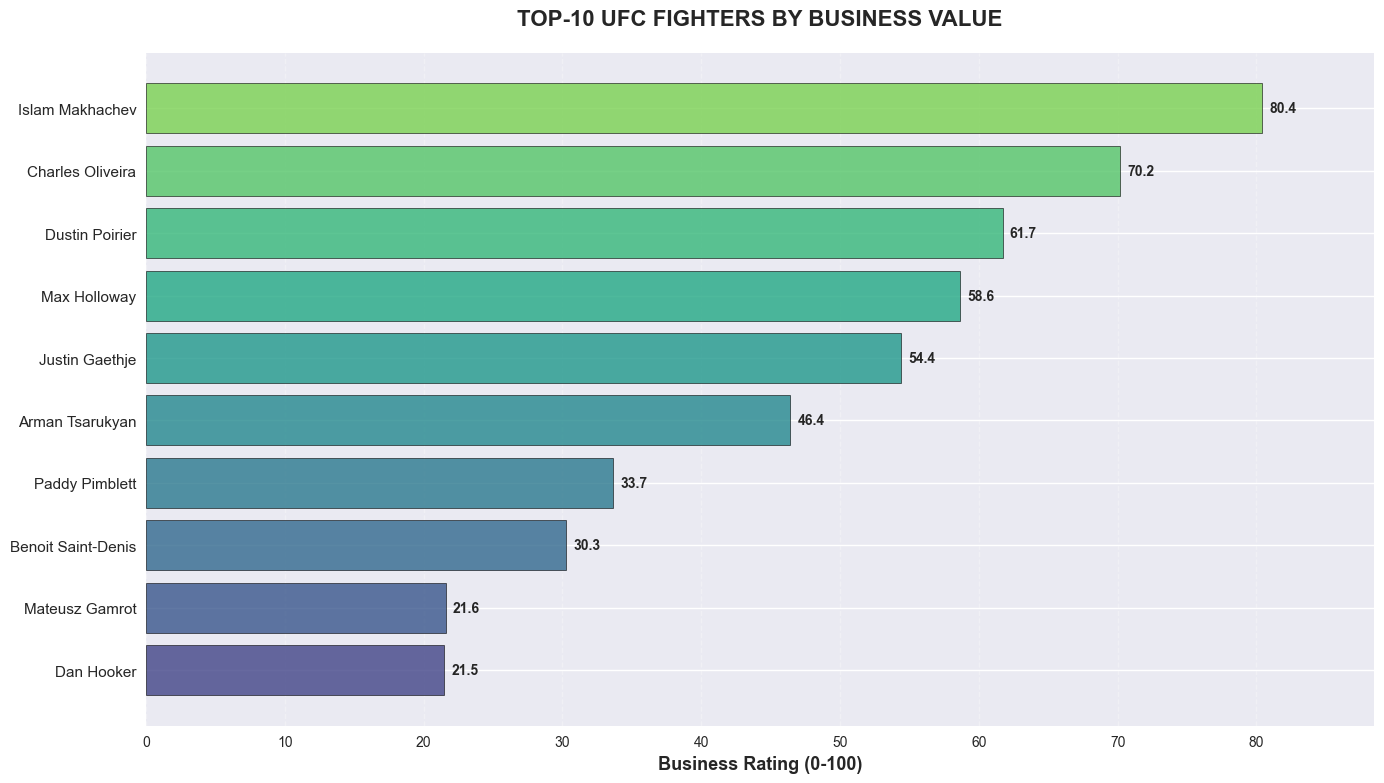

Available columns: ['Name of the fighter', 'Weight category', 'Rank (position in the ranking)', 'Country', 'Age', 'Number of fights in UFC', 'Wins / Losses', 'Fighting style', 'Date of the last battle', 'Fight Fee (approximately $)', 'Bonuses (FOTN, POTN, etc.)', 'Participation in PPV', 'Instagram followers', 'Social media activity (post frequency)', 'Number of battles per year (on average)', 'Downtime between battles', 'Number of cancelled/postponed battles', 'News presence / hype', 'Championship potential', 'PPV_Score', 'Social_Activity_Score', 'Media_Presence_Score', 'Championship_Potential_Score', 'Activity_Frequency_Score', 'Age_normalized', 'Number of fights in UFC_normalized', 'Fight Fee (approximately $)_normalized', 'Bonuses (FOTN, POTN, etc.)_normalized', 'Instagram followers_normalized', 'Number of battles per year (on average)_normalized', 'Number of cancelled/postponed battles_normalized', 'PPV_Score_normalized', 'Social_Activity_Score_normalized', 'Media_Presence_Score_no

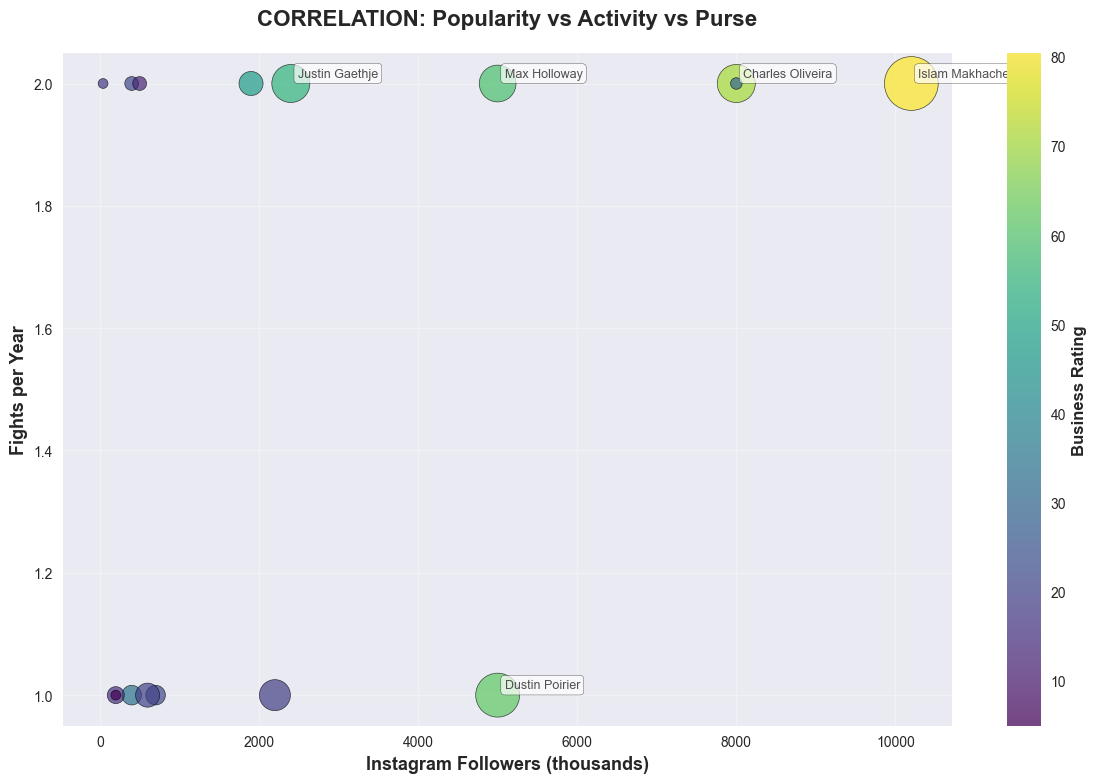

Available columns in DataFrame:
['Name of the fighter', 'Weight category', 'Rank (position in the ranking)', 'Country', 'Age', 'Number of fights in UFC', 'Wins / Losses', 'Fighting style', 'Date of the last battle', 'Fight Fee (approximately $)', 'Bonuses (FOTN, POTN, etc.)', 'Participation in PPV', 'Instagram followers', 'Social media activity (post frequency)', 'Number of battles per year (on average)', 'Downtime between battles', 'Number of cancelled/postponed battles', 'News presence / hype', 'Championship potential', 'PPV_Score', 'Social_Activity_Score', 'Media_Presence_Score', 'Championship_Potential_Score', 'Activity_Frequency_Score', 'Age_normalized', 'Number of fights in UFC_normalized', 'Fight Fee (approximately $)_normalized', 'Bonuses (FOTN, POTN, etc.)_normalized', 'Instagram followers_normalized', 'Number of battles per year (on average)_normalized', 'Number of cancelled/postponed battles_normalized', 'PPV_Score_normalized', 'Social_Activity_Score_normalized', 'Media_Pres

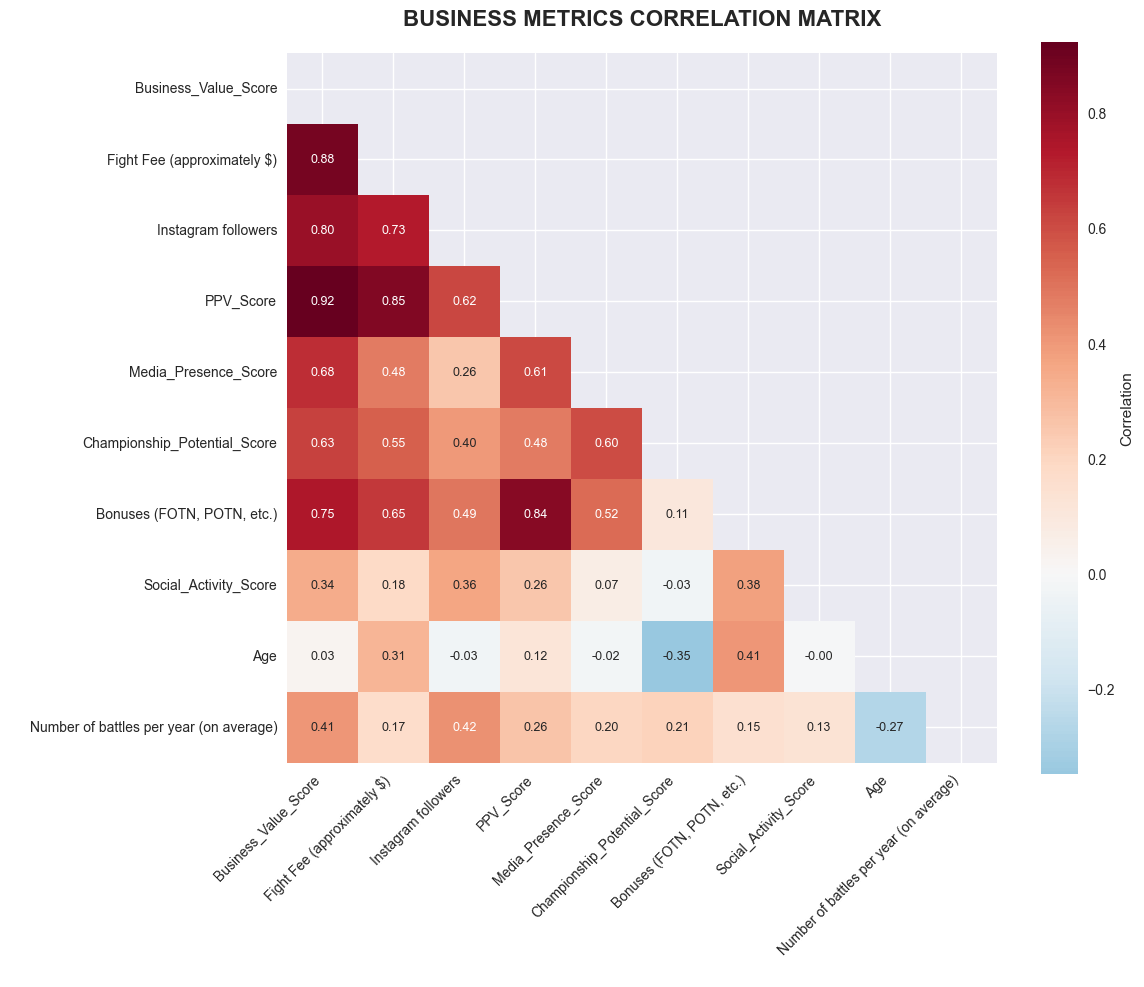

C:\Users\user\AppData\Local\Temp\ipykernel_20784\2893454255.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Rank_Category', y=fee_col,


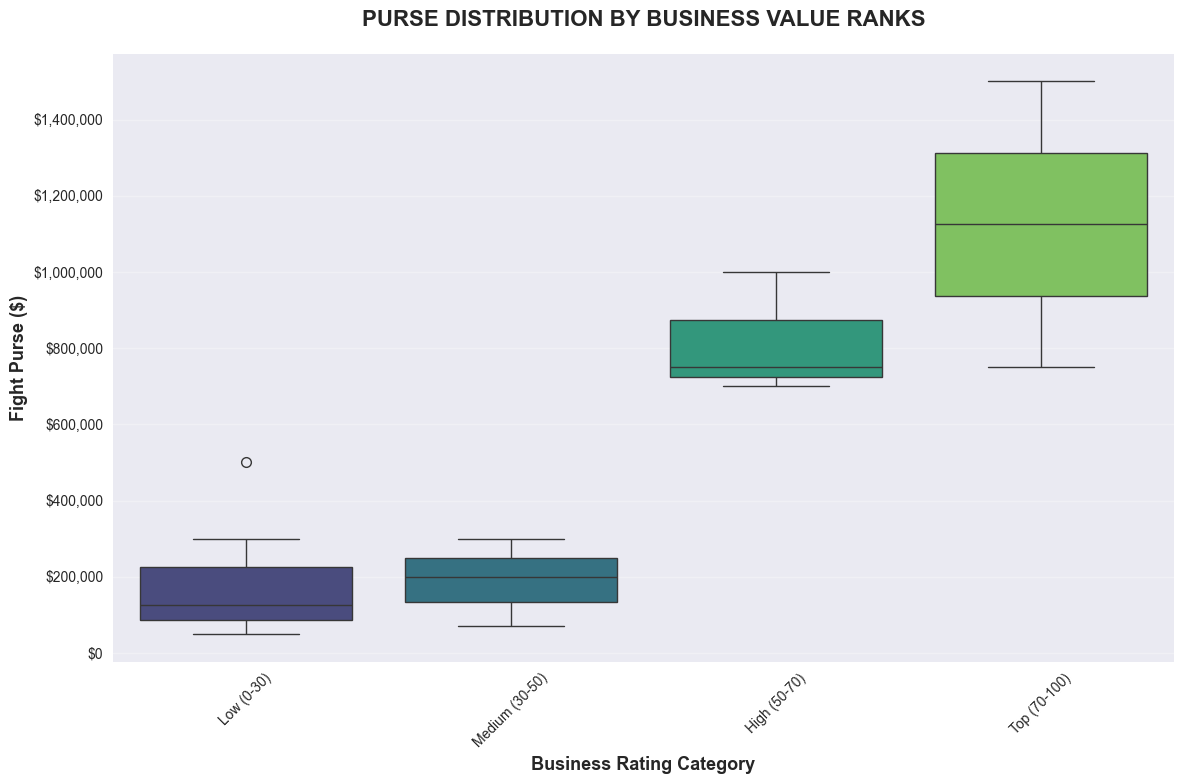


HIDDEN GEMS ANALYSIS (High ROI Potential)
Fighters with high potential at low investment:
------------------------------------------------------------
1. Paddy Pimblett
   Rating: 33.7
   Purse: $200,000
   Potential: 7/10
   Followers: 400,000


MATCHMAKING RECOMMENDATIONS
FIGHTERS FOR MAIN EVENTS (70+ rating):
--------------------------------------------------
• Islam Makhachev (rating: 80.4)
• Charles Oliveira (rating: 70.2)

RISING STARS FOR UNDERCARD (50-70 rating):
--------------------------------------------------
• Dustin Poirier (rating: 61.7)
• Max Holloway (rating: 58.6)
• Justin Gaethje (rating: 54.4)
Exporting columns: ['Name of the fighter', 'Business_Value_Score', 'Age', 'Fight Fee (approximately $)', 'Bonuses (FOTN, POTN, etc.)', 'Instagram followers', 'Number of battles per year (on average)', 'PPV_Score', 'Social_Activity_Score', 'Media_Presence_Score', 'Championship_Potential_Score', 'Fight Fee (approximately $)_normalized', 'Number of battles per year (on average)_

In [34]:
run_full_analysis(df_final)